In [128]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [129]:
# Define column names for the dataset
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

In [130]:
# Load the dataset
df = pd.read_csv('adult.data', header=None, names=col_names)

In [131]:
# Display the distribution of income
print("Distribution of income:")
print(df.income.value_counts(normalize=True))

Distribution of income:
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [132]:
# Clean object columns by stripping extra whitespace
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

In [133]:
# Select features and create the input matrix `X`
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race']
X = pd.get_dummies(df[feature_cols], drop_first=True)

In [134]:
# Create the target variable `y` (1 if income is >50K, else 0)
y = np.where(df.income == '<=50K', 0, 1)

In [135]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [136]:
# Initialize a random forest classifier, train it, and evaluate the accuracy
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
accuracy = rf.score(x_test, y_test)
print(f"Accuracy score for default random forest: {round(accuracy * 100, 3)}%")

Accuracy score for default random forest: 82.005%


In [137]:
# Tune the `max_depth` parameter to find the optimal value
accuracy_train = []
accuracy_test = []
depths = range(1, 26)

In [138]:
# Evaluate random forest performance for each value of max_depth
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))

In [139]:
# Identify the best depth for random forest
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f"Highest accuracy on the test set is achieved with max depth: {best_depth}")
print(f"Highest accuracy on the test set: {round(best_acc * 100, 3)}%")

Highest accuracy on the test set is achieved with max depth: 13
Highest accuracy on the test set: 83.51%


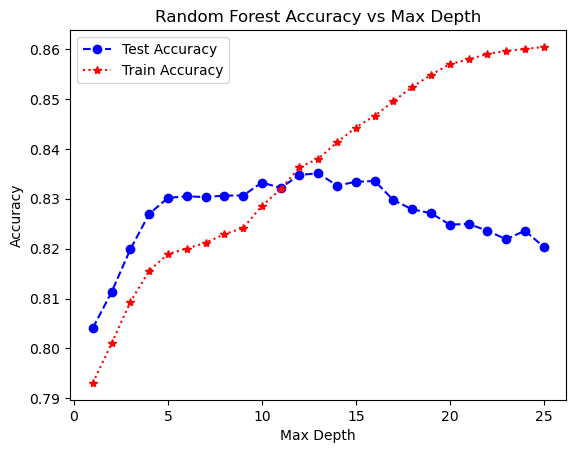

In [140]:
# Plot train and test accuracy over different depths
plt.plot(depths, accuracy_test, 'bo--', depths, accuracy_train, 'r*:')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Max Depth')
plt.show()

In [141]:
# Train the best random forest model and extract feature importances
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_), columns=['Feature', 'Importance'])

In [142]:
# Display the top 5 features
print("Top 5 important features based on the Random Forest model:")
print(feature_imp_df.sort_values('Importance', ascending=False).iloc[:5])

Top 5 important features based on the Random Forest model:
          Feature  Importance
1    capital-gain    0.367978
0             age    0.247740
3  hours-per-week    0.146524
2    capital-loss    0.140280
4        sex_Male    0.075375


In [143]:
# Feature engineering: create new features based on education and native country
df['education_bin'] = pd.cut(df['education-num'], [0, 9, 13, 16], labels=['HS or less', 'College to Bachelors', 'Masters or more'])

# Include new features and recreate the feature matrix `X`
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race', 'education_bin']
X = pd.get_dummies(df[feature_cols], drop_first=True)

In [144]:
# Re-split the data with the new feature set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Evaluate random forest with the new features and find the best max depth
accuracy_train = []
accuracy_test = []
depths = range(1, 10)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))

In [145]:
# Find the best accuracy and corresponding depth with new features
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f"Highest accuracy with the new features is achieved with max depth: {best_depth}")
print(f"Highest test accuracy with the new features: {round(best_acc * 100, 3)}%")

Highest accuracy with the new features is achieved with max depth: 9
Highest test accuracy with the new features: 84.477%


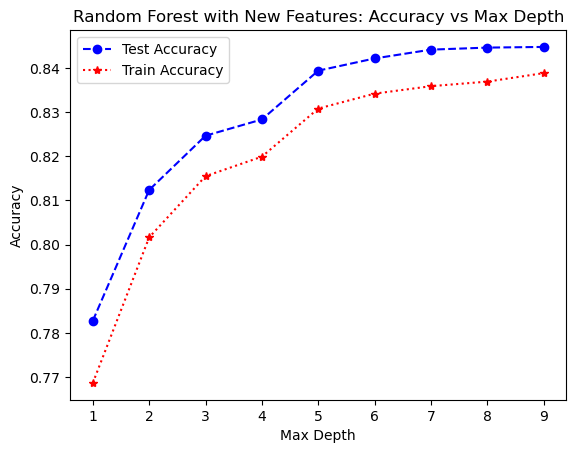

In [146]:
# Plot accuracy for the model with additional features
plt.plot(depths, accuracy_test, 'bo--', depths, accuracy_train, 'r*:')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest with New Features: Accuracy vs Max Depth')
plt.show()

In [147]:

# Retrain and display the top features from the final model
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_), columns=['Feature', 'Importance'])

In [171]:
# Display the top 5 features again
print("Top 5 important features based on the final Random Forest model:")
print(feature_imp_df.sort_values('Importance', ascending=False).iloc[:5])

Top 5 important features based on the final Random Forest model:
                          Feature  Importance
1                    capital-gain    0.318771
0                             age    0.193179
10  education_bin_Masters or more    0.132854
3                  hours-per-week    0.111573
2                    capital-loss    0.101176
